## Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing Dataset

In [2]:
df_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
df_test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Exploratory Data Analysis

In [4]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
print(df_train.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [6]:
print(df_train.duplicated().sum())

0


In [7]:
# df_train.drop_duplicates(inplace=True)

# df_train.dropna(inplace=True)

### Distribution of Fraudulent vs. Legitimate Transactions

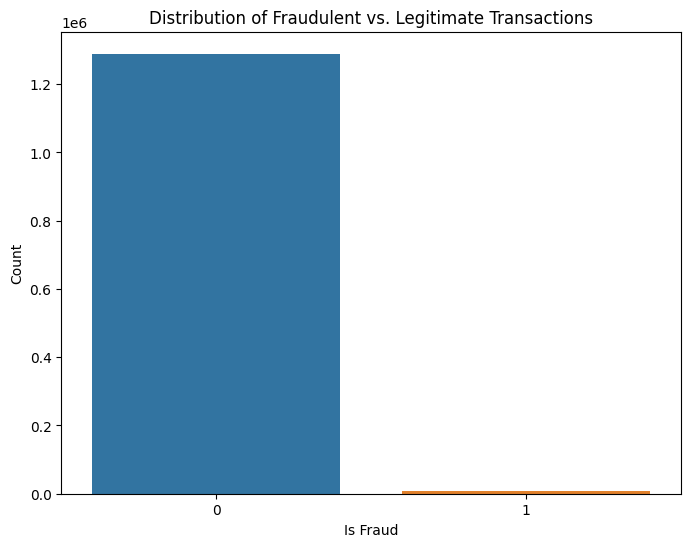

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df_train)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

### Relationship between Transaction Amount and Fraud

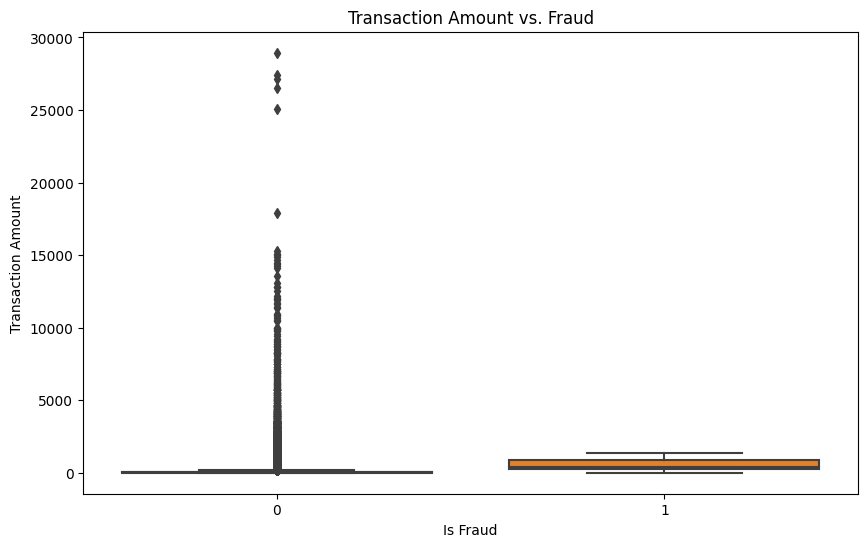

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df_train)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

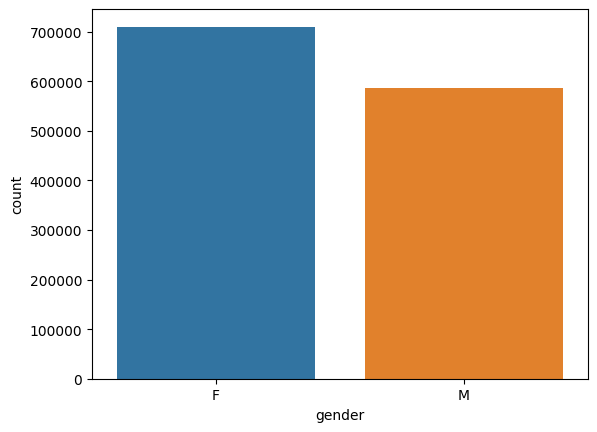

In [10]:
sns.countplot(x=df_train.gender)

### Relationship between Gender and Fraud

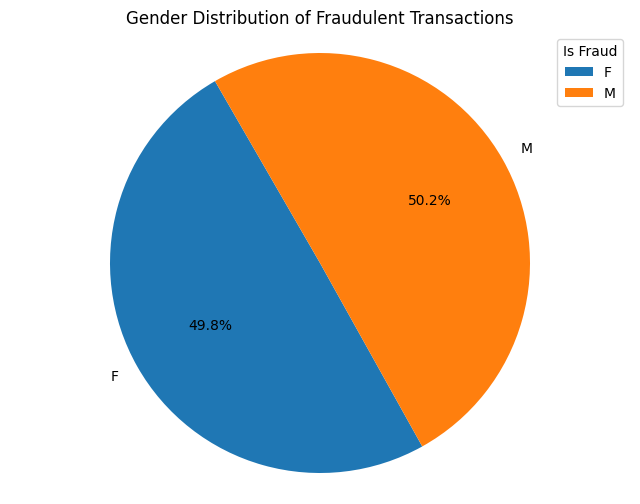

In [11]:
gender_fraud_counts = df_train.groupby(['gender', 'is_fraud']).size().unstack()

plt.figure(figsize=(8, 6))
plt.pie(gender_fraud_counts[1], labels=gender_fraud_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Gender Distribution of Fraudulent Transactions')
plt.axis('equal')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

## Splitting the data

In [12]:
X_train = df_train.drop(['is_fraud', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
y_train = df_train['is_fraud']

X_test = df_test.drop(['is_fraud', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
y_test = df_test['is_fraud']

In [13]:
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.fit_transform(X_test['gender'])

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.9955193182165807
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



## Decision Tree

In [16]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.9847530856422041
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.05      0.17      0.08      2145

    accuracy                           0.98    555719
   macro avg       0.52      0.58      0.54    555719
weighted avg       0.99      0.98      0.99    555719



## Random Forest

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9954329436279846
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.28      0.11      0.16      2145

    accuracy                           1.00    555719
   macro avg       0.64      0.56      0.58    555719
weighted avg       0.99      1.00      0.99    555719



## Model Evaluation

#### Although, the above three models have nearly same accuracy, Logistic Regression is the better option upon comparision.